In [3]:
#   Installing Packages
"""Pytorch."""
import nltk
import numpy as np
from numpy.typing import NDArray
import torch
from typing import List, Optional
from torch import nn
import matplotlib.pyplot as plt

In [4]:
FloatArray = NDArray[np.float64]

In [5]:
def onehot(vocabulary: List[Optional[str]], token: Optional[str]) -> FloatArray:
    """Generate the one-hot encoding for the provided token in the provided vocabulary."""
    embedding = np.zeros((len(vocabulary), 1))
    try:
        idx = vocabulary.index(token)
    except ValueError:
        idx = len(vocabulary) - 1
    embedding[idx, 0] = 1
    return embedding

In [6]:
def logit(x: FloatArray) -> FloatArray:
    """Compute logit (inverse sigmoid)."""
    return np.log(x) - np.log(1 - x)

In [7]:
def normalize(x: torch.Tensor) -> torch.Tensor:
    """Normalize vector so that it sums to 1."""
    return x / torch.sum(x)

In [8]:
def loss_fn(p: float) -> float:
    """Compute loss to maximize probability."""
    return -p

In [9]:
class Unigram(nn.Module):
    def __init__(self, V: int):
        super().__init__()

        # construct initial s - corresponds to uniform p
        s0 = logit(np.ones((V, 1)) / V)
        self.s = nn.Parameter(torch.tensor(s0.astype("float32")))

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        # convert s to proper distribution p
        p = normalize(torch.sigmoid(self.s))

        # compute log probability of input
        return torch.sum(input, 1, keepdim=True).T @ torch.log(p)

In [10]:
"""Demonstrate gradient descent."""
# generate vocabulary
vocabulary = [chr(i + ord("a")) for i in range(26)] + [" ", None]

# generate training document
text = nltk.corpus.gutenberg.raw("austen-sense.txt").lower()

# tokenize - split the document into a list of little strings
tokens = [char for char in text]

# generate one-hot encodings - a V-by-T array
encodings = np.hstack([onehot(vocabulary, token) for token in tokens])

# convert training data to PyTorch tensor
x = torch.tensor(encodings.astype("float32"))

# define model
model = Unigram(len(vocabulary))
# print(type(encodings))
# print(encodings)
print(encodings.shape)
temp_array = np.sum(encodings, 1, keepdims=True)
temp = 0
probabilities = np.array([])
counts = np.array([])
for i in range(temp_array.size):
    temp += temp_array[i] / encodings.shape[1]
    print(
        i,
        temp_array[i],
        temp_array[i] / encodings.shape[1],
        np.log(temp_array[i] / encodings.shape[1]),
    )
    probabilities = np.append(probabilities, temp_array[i] / encodings.shape[1])
    counts = np.append(counts, temp_array[i])

(28, 673022)
0 [40446.] [0.0600961] [-2.81181027]
1 [7938.] [0.01179456] [-4.44011666]
2 [12443.] [0.01848825] [-3.9906198]
3 [22323.] [0.03316831] [-3.40616048]
4 [66609.] [0.09897002] [-2.31293832]
5 [12227.] [0.01816731] [-4.0081314]
6 [9552.] [0.0141927] [-4.25502746]
7 [32264.] [0.047939] [-3.03782596]
8 [36524.] [0.05426866] [-2.91380844]
9 [948.] [0.00140857] [-6.5651788]
10 [2780.] [0.00413062] [-5.48932709]
11 [20628.] [0.03064982] [-3.48512864]
12 [14617.] [0.02171846] [-3.82959278]
13 [38444.] [0.05712146] [-2.86257538]
14 [42015.] [0.06242738] [-2.77375132]
15 [7946.] [0.01180645] [-4.43910936]
16 [604.] [0.00089744] [-7.0159591]
17 [33246.] [0.04939809] [-3.00784356]
18 [32772.] [0.0486938] [-3.02220353]
19 [44995.] [0.06685517] [-2.70522665]
20 [14717.] [0.02186704] [-3.82277473]
21 [5849.] [0.00869065] [-4.74550731]
22 [12655.] [0.01880325] [-3.97372562]
23 [840.] [0.0012481] [-6.68613141]
24 [11678.] [0.01735159] [-4.05407129]
25 [69.] [0.00010252] [-9.18542679]
26 [108

In [11]:
print(encodings.shape[0])
print(encodings.shape[1])
print(temp)
print(probabilities)
log_probabilities = np.log(probabilities)
print(log_probabilities)
known_min_probability = -counts.T @ log_probabilities
print(known_min_probability)
# print(np.log(known_min_probability))
# print(np.log(known_min_probability) - np.log(1 - known_min_probability))
print((logit(loss_fn(known_min_probability))))
# set number of iterations and learning rate
num_iterations = 1000  # SET THIS
learning_rate = 0.01  # SET THIS

28
673022
[1.]
[6.00961038e-02 1.17945624e-02 1.84882515e-02 3.31683065e-02
 9.89700188e-02 1.81673110e-02 1.41927010e-02 4.79389975e-02
 5.42686569e-02 1.40857208e-03 4.13062277e-03 3.06498153e-02
 2.17184579e-02 5.71214611e-02 6.24273798e-02 1.18064491e-02
 8.97444660e-04 4.93980880e-02 4.86938020e-02 6.68551697e-02
 2.18670415e-02 8.69065201e-03 1.88032486e-02 1.24810185e-03
 1.73515873e-02 1.02522652e-04 1.61535581e-01 5.82090927e-02]
[-2.81181027 -4.44011666 -3.9906198  -3.40616048 -2.31293832 -4.0081314
 -4.25502746 -3.03782596 -2.91380844 -6.5651788  -5.48932709 -3.48512864
 -3.82959278 -2.86257538 -2.77375132 -4.43910936 -7.0159591  -3.00784356
 -3.02220353 -2.70522665 -3.82277473 -4.74550731 -3.97372562 -6.68613141
 -4.05407129 -9.18542679 -1.82302984 -2.8437137 ]
1956525.8508438326
nan


C:\Users\divya\AppData\Local\Temp\ipykernel_25896\430569059.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.log(1 - x)


In [61]:
np.set_printoptions(suppress=True)

In [62]:
print("Known Minimum Loss Value: ", known_min_probability)
print("Known Probabilities: \n", actual_probabilities)
print("Model Probabilities: \n", assigned_probabilities)

Known Minimum Loss Value:  1956525.8508438326
Known Probabilities: 
 [0.0600961  0.01179456 0.01848825 0.03316831 0.09897002 0.01816731
 0.0141927  0.047939   0.05426866 0.00140857 0.00413062 0.03064982
 0.02171846 0.05712146 0.06242738 0.01180645 0.00089744 0.04939809
 0.0486938  0.06685517 0.02186704 0.00869065 0.01880325 0.0012481
 0.01735159 0.00010252 0.16153558 0.05820909]
Model Probabilities: 
 [0.060044   0.011733   0.01845325 0.03316603 0.09872618 0.01813125
 0.01414192 0.04792133 0.05423482 0.00169563 0.00401792 0.03064405
 0.02169324 0.05707906 0.06236716 0.01174495 0.0013843  0.04937708
 0.04867443 0.06677827 0.02184223 0.00861092 0.01876927 0.00159273
 0.01731275 0.00099377 0.16070712 0.05816324]


In [12]:
# initialize lists to store loss and iteration values
losses = []
iterations = []
# train model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for _ in range(num_iterations):
    p_pred = model(x)
    loss = -p_pred
    loss.backward(retain_graph=True)
    optimizer.step()
    optimizer.zero_grad()
    # append loss and iteration values to lists
    losses.append(loss.item())
    # print(loss.item())
    iterations.append(_)

# print(min_loss)
# print(min_loss_item)
# display results
# plot loss as a function of iterations
print(losses)

[2242647.0, 2237840.0, 2233094.25, 2228412.0, 2223793.5, 2219240.0, 2214753.0, 2210332.5, 2205980.25, 2201696.0, 2197480.75, 2193334.25, 2189257.25, 2185249.5, 2181311.25, 2177442.0, 2173641.75, 2169910.75, 2166248.0, 2162653.5, 2159126.75, 2155667.5, 2152274.75, 2148948.25, 2145687.0, 2142490.75, 2139358.0, 2136287.75, 2133279.0, 2130331.25, 2127443.0, 2124613.5, 2121841.25, 2119124.5, 2116463.25, 2113855.5, 2111300.5, 2108797.0, 2106344.5, 2103941.0, 2101585.5, 2099277.0, 2097015.125, 2094798.125, 2092624.25, 2090494.0, 2088405.0, 2086356.875, 2084348.75, 2082379.0, 2080447.25, 2078552.625, 2076693.75, 2074869.75, 2073080.25, 2071324.125, 2069600.375, 2067908.0, 2066246.75, 2064616.0, 2063014.25, 2061441.5, 2059896.375, 2058378.875, 2056888.0, 2055422.875, 2053983.5, 2052568.625, 2051178.125, 2049811.375, 2048467.75, 2047146.5, 2045847.875, 2044570.375, 2043313.875, 2042078.125, 2040862.875, 2039667.375, 2038491.0, 2037333.875, 2036195.5, 2035074.875, 2033972.375, 2032887.875, 203181

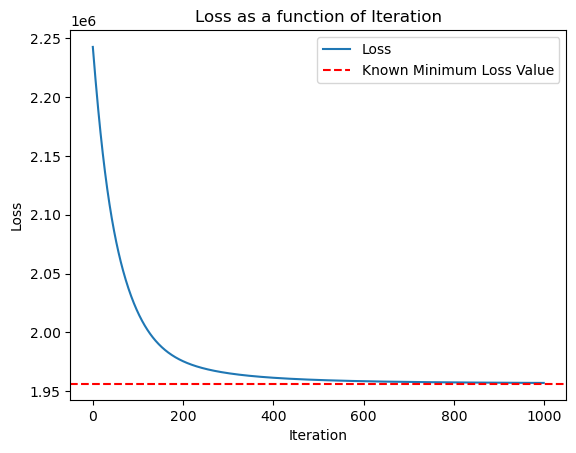

<Figure size 640x480 with 0 Axes>

In [48]:
# plt.plot(iterations, losses)
# plt.axhline(y=known_min_probability, color="r", linestyle="--")
plt.plot(iterations, losses, label="Loss")
plt.axhline(
    y=known_min_probability, color="r", linestyle="--", label="Known Minimum Loss Value"
)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss as a function of Iteration")
plt.show()
plt.savefig("../Resources/loss.png")

In [14]:
# print(model.s)
# print(len(model.s))
# print(model.s[0])
# print(model.s[0].item())
model_parameters = np.array([])
for i in range(len(model.s)):
    # print(model.s[i].item())
    model_parameters = np.append(model_parameters, model.s[i].item())
model_parameters

array([-2.32967162, -4.03773832, -3.57474947, -2.96586823, -1.7676456 ,
       -3.5928421 , -3.84737229, -2.57464814, -2.44079828, -5.98706245,
       -5.12090874, -3.04886556, -3.40805721, -2.38510633, -2.28793764,
       -4.03670263, -6.19038582, -2.54240561, -2.55785704, -2.21239567,
       -3.400985  , -4.35179472, -3.55728912, -6.04982138, -3.64027715,
       -6.52240896, -1.16703272, -2.36453962])

In [25]:
gd_assigned_probabilities = normalize(torch.sigmoid(model.s))
assigned_probabilities = np.array([])
actual_probabilities = np.array([])
difference = np.array([])
characters = vocabulary.copy()
characters[-1] = "None"
for i in range(len(gd_assigned_probabilities)):
    print(
        i,
        characters[i],
        gd_assigned_probabilities[i].item(),
        probabilities[i],
        probabilities[i] - gd_assigned_probabilities[i].item(),
    )
    assigned_probabilities = np.append(
        assigned_probabilities, gd_assigned_probabilities[i].item()
    )  # Predicted Probabilities based on Gradient Descent
    actual_probabilities = np.append(
        actual_probabilities, probabilities[i]
    )  # True Probabilities based on the training data
    difference = np.append(
        difference, probabilities[i] - gd_assigned_probabilities[i].item()
    )  # Difference between Actual and Predicted

0 a 0.060044001787900925 0.06009610384207351 5.210205417258834e-05
1 b 0.011732998304069042 0.011794562436294802 6.156413222575992e-05
2 c 0.01845325157046318 0.01848825149846513 3.4999928001950426e-05
3 d 0.033166032284498215 0.03316830653381316 2.2742493149471854e-06
4 e 0.09872618317604065 0.09897001881067781 0.00024383563463716007
5 f 0.018131248652935028 0.01816731102400813 3.60623710731027e-05
6 g 0.014141920953989029 0.014192700981542952 5.0780027553922955e-05
7 h 0.047921326011419296 0.047938997536484694 1.7671525065397764e-05
8 i 0.0542348213493824 0.054268656893831105 3.383554444870429e-05
9 j 0.001695633982308209 0.0014085720823390616 -0.0002870618999691473
10 k 0.004017924424260855 0.004130622773104 0.00011269834884314496
11 l 0.030644049867987633 0.030649815310643633 5.765442655999986e-06
12 m 0.021693238988518715 0.021718457940453656 2.521895193494106e-05
13 n 0.05707906186580658 0.05712146111122668 4.239924542009943e-05
14 o 0.06236715614795685 0.062427379788476456 6.022

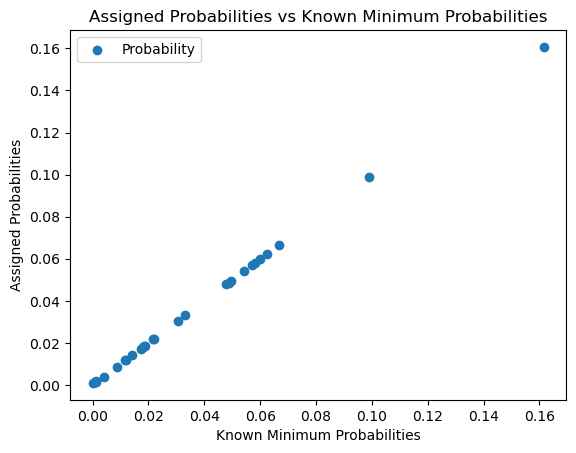

<Figure size 640x480 with 0 Axes>

In [44]:
plt.title("Assigned Probabilities vs Known Minimum Probabilities")
plt.scatter(actual_probabilities, assigned_probabilities, label="Probability")
plt.xlabel("Known Minimum Probabilities")
plt.ylabel("Assigned Probabilities")
plt.legend()
plt.show()
plt.savefig("..\Resources/Probability_Scatter.png")

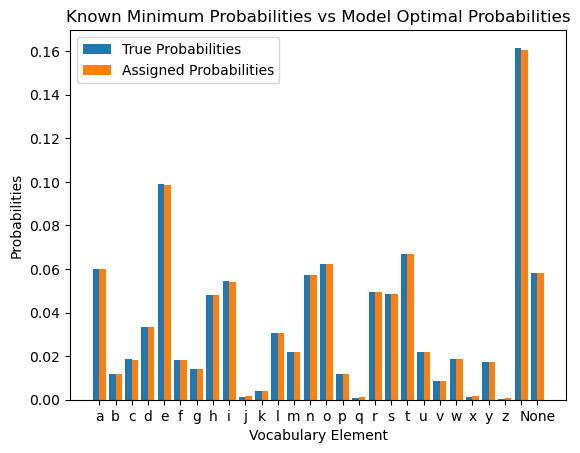

In [30]:
plt.title("Known Minimum Probabilities vs Model Optimal Probabilities")

X = characters
Y = actual_probabilities
Z = assigned_probabilities

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Y, 0.4, label="True Probabilities")
plt.bar(X_axis + 0.2, Z, 0.4, label="Assigned Probabilities")
plt.xlabel("Vocabulary Element")
plt.ylabel("Probabilities")
plt.xticks(np.arange(len(characters)), characters)
plt.legend()
plt.savefig("..\Resources/Prob_Comp.png")

In [33]:
import pandas as pd

df = pd.DataFrame(
    {
        "Characters": characters,
        "Actual Probabilities": actual_probabilities,
        "Assigned Probabilities": assigned_probabilities,
        "Difference": difference,
    }
)

In [43]:
import tabulate

f = open("../Resources/Summary.md", "w", encoding="utf-8")
f.write(![]("Iterative_Losses.png"))
f.write("\n\n\n")
f.write(df.to_markdown())
f.write("\n\n\n")
f.write(f"""![Graph 2]({"Prob_Comp.png"})""")
f.close()

SyntaxError: invalid syntax (3541338655.py, line 4)

In [53]:
df.to_excel("../Resources/Summary.xlsx")

,Characters,Actual Probabilities,Assigned Probabilities,Difference
0,a,0.060096,0.060044,0.000052
1,b,0.011795,0.011733,0.000062
2,c,0.018488,0.018453,0.000035
3,d,0.033168,0.033166,0.000002
4,e,0.098970,0.098726,0.000244
5,f,0.018167,0.018131,0.000036
6,g,0.014193,0.014142,0.000051
7,h,0.047939,0.047921,0.000018
8,i,0.054269,0.054235,0.000034
9,j,0.001409,0.001696,-0.000287


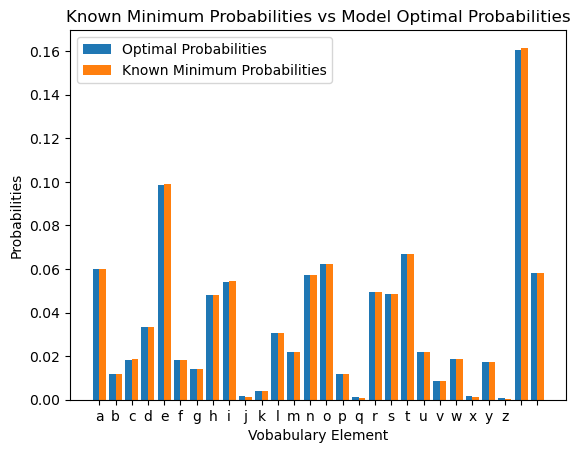

<Figure size 640x480 with 0 Axes>

In [22]:
# Bar plot of Known vs Optimal Values
plt.bar(
    np.arange(len(vocabulary)) - 0.2,
    assigned_probabilities,
    0.4,
    label="Optimal Probabilities",
)
plt.bar(
    np.arange(len(vocabulary)) + 0.2,
    actual_probabilities,
    0.4,
    label="Known Minimum Probabilities",
)

plt.xticks(np.arange(len(vocabulary)), vocabulary)
plt.xlabel("Vocabulary Element")
plt.ylabel("Probabilities")
plt.title("Known Minimum Probabilities vs Model Optimal Probabilities")
plt.legend()
plt.show()
plt.savefig("..\Resources/Prob_Comp.png")

In [ ]:
model_parameters_sigmoid_normalized = normalize(model.s)
# print(model_parameters_sigmoid_normalized)
for i in range(len(model_parameters_sigmoid_normalized)):
    print(
        np.log(model_parameters_sigmoid_normalized[i].item()),
        # np.log(-model_parameters_sigmoid_normalized[i].item()),
        np.log(model_parameters_sigmoid[i].item()),
        # np.log(-model_parameters_sigmoid[i].item()),
        logit(model_parameters_sigmoid_normalized[i].item()),
        # logit(-model_parameters_sigmoid_normalized[i].item()),
        logit(model_parameters_sigmoid[i].item()),
        logit(-model_parameters_sigmoid[i].item()),
    )

-3.7388641976429513 -0.16755828505276182 -3.7147957643261376 1.7014753247094432 nan
-3.1889068534850478 0.33338512942517956 -3.146816448168885 nan nan
-3.3106964870142273 0.24207921098154828 -3.2735232967042043 nan nan
-3.497421722113725 0.0835778217456705 -3.466678617505853 nan nan
-4.014943064477038 -0.562735792249068 -3.9967343047964046 0.2804171473257263 nan
-3.3056480045166876 0.2460343943155918 -3.268283112445435 nan nan
-3.237201102922781 0.29816968030723223 -3.197135421955233 nan nan
-3.638878660826077 -0.05581626462245015 -3.6122453230313334 2.857652031795296 nan
-3.692266390899695 -0.11392469398009443 -3.667035276787776 2.11471455464659 nan
-2.794990683589256 0.581992624895026 -2.7319279330128197 nan nan
-2.951259657349443 0.49062204565216094 -2.8975700020228627 nan nan
-3.4698219719849015 0.10864772239945149 -3.438204804779823 nan nan
-3.358449116780489 0.2038729781008153 -3.323040390850299 nan nan
-3.715347871622234 -0.14013175100552905 -3.6906996137759083 1.894288274161005

C:\Users\divya\AppData\Local\Temp\ipykernel_2964\430569059.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.log(1 - x)


In [ ]:
print(model_parameters)
model_parameters_sigmoid = np.log(-model_parameters)
print(model_parameters_sigmoid)

[-2.32967162 -4.03773832 -3.57474947 -2.96586823 -1.7676456  -3.5928421
 -3.84737229 -2.57464814 -2.44079828 -5.98706245 -5.12090874 -3.04886556
 -3.40805721 -2.38510633 -2.28793764 -4.03670263 -6.19038582 -2.54240561
 -2.55785704 -2.21239567 -3.400985   -4.35179472 -3.55728912 -6.04982138
 -3.64027715 -6.52240896 -1.16703272 -2.36453962]
[0.84572732 1.39568471 1.2738951  1.08716982 0.56964849 1.27894356
 1.34739039 0.94571288 0.89232515 1.78960088 1.63333191 1.11476957
 1.2261424  0.8692437  0.82765082 1.39542818 1.82299741 0.93311072
 0.93916981 0.79407594 1.2240651  1.47058834 1.26899877 1.80002875
 1.29205982 1.87524378 0.15446439 0.86058334]


In [ ]:
print(model_parameters)
model_parameters_sigmoid_2 = logit(-model_parameters)
print(model_parameters_sigmoid_2)

[-2.32967162 -4.03773832 -3.57474947 -2.96586823 -1.7676456  -3.5928421
 -3.84737229 -2.57464814 -2.44079828 -5.98706245 -5.12090874 -3.04886556
 -3.40805721 -2.38510633 -2.28793764 -4.03670263 -6.19038582 -2.54240561
 -2.55785704 -2.21239567 -3.400985   -4.35179472 -3.55728912 -6.04982138
 -3.64027715 -6.52240896 -1.16703272 -2.36453962]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


C:\Users\divya\AppData\Local\Temp\ipykernel_2964\430569059.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.log(1 - x)
